In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import scipy
from scipy.optimize import curve_fit
import matplotlib.colors as colors
from numpy import polyfit, poly1d

In [2]:
#Load data
data_20 = np.load('C:/Users/wangy/Rydberg simulation/rydberg_data/1_12_23/2023_01_12_00_42_03L20.npy',allow_pickle=True).tolist()
data_24 = np.load('C:/Users/wangy/Rydberg simulation/rydberg_data/1_12_23/2023_01_12_00_42_03L24.npy',allow_pickle=True).tolist()
data_28 = np.load('C:/Users/wangy/Rydberg simulation/rydberg_data/1_12_23/2023_01_12_00_42_03L28.npy',allow_pickle=True).tolist()
data_32 = np.load('C:/Users/wangy/Rydberg simulation/rydberg_data/1_12_23/2023_01_12_00_42_03L32.npy',allow_pickle=True).tolist()
data = [data_20,data_24,data_28,data_32]
N = [20,24,28,32]
t = []
detuning = [] 
rabi = [] 
E = [] 
overlap = []
z_list = []
zz_list = []
zg_list = []
zzg_list = []
for i in range(len(N)):
    t.append(np.array(data[i]['nT'])[:,1]) # scan time
    detuning.append(np.array(data[i]['nT'])[:,3]) # detuning
    rabi.append(np.array(data[i]['nT'])[:,2]) # Rabi
    E.append(np.array(data[i]['E'])) # energy for the lowest three states
    overlap.append(np.array(data[i]['overlap']))# overlap with fm, afm, ground state, 1st excited state, 2nd excited state
    z_list.append(np.array(data[i]['z'])) # rydberg population  
    zz_list.append(np.array(data[i]['zz']))# correlation of the rydbegrg population
    zg_list.append(np.array(data[i]['zg']))# rydberg population for the ground state
    zzg_list.append(np.array(data[i]['zzg']))# correlation of the rydberg population for the ground state
    print('i',i)
    print(zzg_list[i].shape)

i 0
(174, 20, 20)
i 1
(174, 24, 24)
i 2
(174, 28, 28)
i 3
(174, 32, 32)


In [3]:
sigma_1_list = []
sigma_2_list = []
x_list = []
for i in range(len(N)):
    sigma1 = [] # single body sigma field
    sigma2 = [] # correlation of sigma field
    # do something
    sign = np.ones(N[i])
    sign[0::2]=-1
    x_temp = np.arange(N[i])
    x_list.append(x_temp)
    for t_index in range(len(data[i]['zz'])):
        n_temp = np.array(data[i]['z'])[t_index] # rydberg population at time t
        n_temp_mean = np.mean(n_temp)
        nn_temp = np.array(data[i]['zz'])[t_index]
        sigma_temp = (n_temp[:]-n_temp_mean)*sign
        sigma1.append(sigma_temp)
        for x in x_temp:
            temp_g = (-1)**x *(nn_temp[0,x]-n_temp_mean*n_temp[0]-n_temp_mean*n_temp[x]+n_temp_mean**2)
            sigma2.append(temp_g)
    sigma2 = np.array(sigma2)
    sigma2 = sigma2.reshape(len(data[i]['zg']),N[i])
    sigma_1_list.append(sigma1)   
    sigma_2_list.append(sigma2)


20
24
28
32


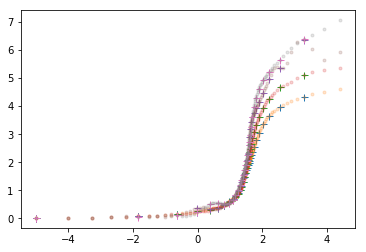

In [18]:
sampled_y = []
order_list = []
det_list = []
for i_n,i in enumerate(range(len(N))):
#for i_n,i in enumerate([0,1,3]):
    print(len(x_list[i]))
    temp = sigma_2_list[i][20::5]
    x = detuning[i][20::5]
    det_list.append(x)
    y = np.sum(temp,axis=1)
    order_list.append(y)
    plt.plot(x,y,marker = '+',markersize = 7, ls ='')
    plt.plot(detuning[i][20:],np.sum(sigma_2_list[i][20:],axis=1),marker = 'o',markersize = 3,ls ='',alpha = 0.2)
#plt.yscale('log')
sampled_y = np.array(sampled_y)
#plt.ylim([0.1,0.8])


In [20]:
def func_erf(x,x0,A,B):
    return (scipy.special.erf((x-x0)/B)+1)*A
def func_logistic(x,x0,A,B):
    return A/(1+np.exp(-(x-x0)/B))

[1.63312247 4.32637772 0.32331733]
[1.62841848 2.14619669 0.7521779 ]
[0.02041846 0.05038146 0.03683932]
[1.63642092 4.97036713 0.26800993]
[1.63452911 2.47176215 0.62723907]
[0.01924711 0.06247399 0.03540459]
[1.63490936 5.84688998 0.25256646]
[1.63606871 2.91793094 0.59664907]
[0.02541284 0.10091687 0.04694699]
[1.63351108 6.06286251 0.23950473]
[1.63053369 3.0100908  0.55809317]
[0.01959771 0.08434207 0.03661852]


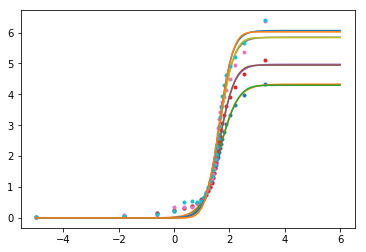

In [21]:
for i in range(len(N)):
    plt.plot(det_list[i],order_list[i],ls='',marker='.')
    x_list = np.linspace(-5,6,100)
    #plt.plot(x_list,func_logistic(x_list,1.45,13,0.3))
    #plt.plot(x_list,(scipy.special.erf(x_list)+1)*7)
    p,perr = curve_fit(func_logistic,det_list[i],order_list[i],p0=[1.45,13,0.3])
    print(p)
    plt.plot(x_list,func_logistic(x_list,*p))

    p,perr = curve_fit(func_erf,det_list[i],order_list[i],p0=[1.45,13,0.3])
    print(p)
    print(np.diag(perr)**0.5)
    plt.plot(x_list,func_erf(x_list,*p))

20
24
28
32


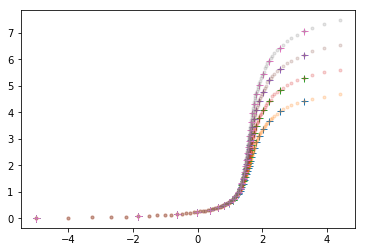

In [23]:
# for ground state 
sigma_1_g_list = []
sigma_2_g_list = []
x_list = []
for i in range(len(N)):
    sigma1_g = [] # single body sigma field
    sigma2_g = [] # correlation of sigma field
    # do something
    sign = np.ones(N[i])
    sign[0::2]=-1
    x_temp = np.arange(N[i])
    x_list.append(x_temp)
    for t_index in range(len(data[i]['zg'])):
        n_temp = np.array(data[i]['zg'])[t_index] # rydberg population at time t
        n_temp_mean = np.mean(n_temp)
        nn_temp = np.array(data[i]['zzg'])[t_index]
        sigma_temp = (n_temp[:]-n_temp_mean)*sign
        sigma1_g.append(sigma_temp)
        for x in x_temp:
            temp_g = (-1)**x *(nn_temp[0,x]-n_temp_mean*n_temp[0]-n_temp_mean*n_temp[x]+n_temp_mean**2)
            sigma2_g.append(temp_g)
    sigma2_g = np.array(sigma2_g)
    sigma2_g = sigma2_g.reshape(len(data[i]['zg']),N[i])
    sigma_1_g_list.append(sigma1_g)   
    sigma_2_g_list.append(sigma2_g)
order_g_list = []
det_g_list = []
for i_n,i in enumerate(range(len(N))):
#for i_n,i in enumerate([0,1,3]):
    print(len(x_list[i]))
    temp = sigma_2_g_list[i][20::5]
    x = detuning[i][20::5]
    det_g_list.append(x)
    y = np.sum(temp,axis=1)
    order_g_list.append(y)
    plt.plot(x,y,marker = '+',markersize = 7, ls ='')
    plt.plot(detuning[i][20:],np.sum(sigma_2_g_list[i][20:],axis=1),marker = 'o',markersize = 3,ls ='',alpha = 0.2)
#plt.yscale('log')
sampled_y = np.array(sampled_y)
#plt.ylim([0.1,0.8])


[1.63312247 4.32637772 0.32331733]
[1.62841848 2.14619669 0.7521779 ]
[0.02041846 0.05038146 0.03683932]
[1.63642092 4.97036713 0.26800993]
[1.63452911 2.47176215 0.62723907]
[0.01924711 0.06247399 0.03540459]
[1.63490936 5.84688998 0.25256646]
[1.63606871 2.91793094 0.59664907]
[0.02541284 0.10091687 0.04694699]
[1.63351108 6.06286251 0.23950473]
[1.63053369 3.0100908  0.55809317]
[0.01959771 0.08434207 0.03661852]


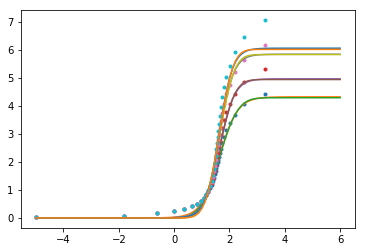

In [24]:
for i in range(len(N)):
    plt.plot(det_g_list[i],order_g_list[i],ls='',marker='.')
    x_list = np.linspace(-5,6,100)
    #plt.plot(x_list,func_logistic(x_list,1.45,13,0.3))
    #plt.plot(x_list,(scipy.special.erf(x_list)+1)*7)
    p,perr = curve_fit(func_logistic,det_list[i],order_list[i],p0=[1.45,13,0.3])
    print(p)
    plt.plot(x_list,func_logistic(x_list,*p))

    p,perr = curve_fit(func_erf,det_list[i],order_list[i],p0=[1.45,13,0.3])
    print(p)
    print(np.diag(perr)**0.5)
    plt.plot(x_list,func_erf(x_list,*p))